### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Muyuan Yang

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    You should run the file “main.py” in the terminal with the command [- - Remote] for remote use. If you have downloaded the data once, you may use[- - Local] command for local manipulate next time. To show this commands, you may use [- h] to view helps and instructions in command line. Once you use the [- - Remote], you will invoke the code, it will download TOP100 Universities in UK ’s information  and store them in the file :/data. In that file, you will find a .db document called “crimerecord.db” which contains three tables to show school ranks, coordinates and crime records from Jan. to Oct.,2019. 
(If you start with “- - Local”, it begins here) After that, the code will invoke the analysis part, it will clean, re-organize, extract the useful data from the initial database and create three new tables to save these new data. And it will generate two general statistical graphs automatically and save them in same path. Then you can find an interface, just use number to make your query under the text instructions. If your query’s result is a graph, it will be saved to the same path, too. Use number “8” to quit the program.

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    The speed of data scraping is not fast enough(About 12mins) And  charts are not beautiful enough. Maybe the type of graphs should be expanded.

4.  **Anything else you feel is relevant to the grading of your project your project.**

   I design a simple but useful interface so that you can generate the graphs separately under your thoughts rather than get all the graphs at same time. In other words, you can custom your analysis in this project.



5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    I design this project to see the crime records’ distribution of UK’s famous universities. 
By analyzing the crime records of each university, I may define whether a British university is safe or not. And I also can show what are top crime types for a school. At the same time, I  do some research about the ‘crime’ itself. For instance, I gave the distribution graph of crime records by schools and month and give a trend  graph to show them directly. The result of my project may be applied to reference for other students, they can find out that the safety condition of British universities.


6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**


    TOP 10 Dangerous UK University :
    
    London South Bank; 
    Cardiff;
    Oxford;
    University of the Arts, London; 
    York;
    Edinburgh; 
    Teesside;
    Southampton;  
    Brunel University London; 
    Loughborough


    Universities without crime records in last ten month:
    
    Edge Hill;  
    Edinburgh Napier;  
    Heriot-Watt; 
    Liverpool Hope; 
    Liverpool John Moores; 
    Northumbria; 
    Nottingham; 
    Nottingham Trent; 
    St Andrews; 
    Staffordshire; 
    Sussex; 


    For most schools, “anti-social-behaviour” is the most common crime type.


    Not only general speaking, but also for the most schools, Jan.-Feb. & June-July always has the least crime records. We can infer that crime are more likely to occur in formal semesters rather than vocations.

7. **What difficulties did you have in completing the project?**  

    It took me long time to deal with SQL, especially about how to use joint within more than one tables. Another difficult for me is  how to use the  “argparser” to indicate users whether they will run the main file.

8. **What skills did you wish you had while you were doing the project?**

    I wish I had stronger skills about data visualization. For my result, all the visualization part is present as static graph. If I could plot some dynamic graphs, the soundness of effect will be strengthened.



9. **What would you do “next” to expand or augment the project?**

    For next step, I may design a new grader system for these schools. As a result, I can give every school a “Safety Index” to show it safety condition. Further, I can combine the original score with this index, give them a weighted algorithm to calculate the final score of a school.  So I can reorganize the school list to give a new rank which contains the safety factor.

In [4]:
import requests
from bs4 import BeautifulSoup 
import json
import sqlite3
import matplotlib.pyplot as plt 
import argparse
import re
import pandas as pd
import matplotlib

In [20]:
class analysis():
    def __init__(self):
        # connect to database
        self.conn = sqlite3.connect("data/crimerecord.db") 
        self.c = self.conn.cursor() 
        
    def create_data_base(self): 
        
        # extract and clean the data from the original tables and store the results in new tables
        # creat TABLE  recordwith total
        
        self.c.execute('DROP TABLE IF EXISTS Records2') 
        self.c.execute('CREATE TABLE Records2 (school_id Integer, name Text, month Text,Total Integer)')
    
    
    def STAT(self):
        #give a description 
        print("\n\n###################### CRIME RECORDS DISTRIBUTIONS ######################") 
        
        
        self.create_data_base()
        
        sql="""select *,(drugs+"vehicle-crime"+shoplifting+burglary+robbery+"anti-social-behaviour"+"possession-of-weapons"+"public-order"+ "bicycle-theft"+
                    "theft-from-the-person"+ "other-theft"+ "violent-crime"+ "criminal-damage-arson"+"other-crime") as Total from Records """
        self.c.execute(sql)
        results = self.c.fetchall()
    
        for result in results:
            self.c.execute("""Insert into Records2 (school_id,name,month,Total) VALUES (?,?,?,?) """,(result[0],result[1],int(result[2].split('-')[1]),result[-1]))
        self.conn.commit()   
        
        # visulize Top 10 schools that have the most crime records
       
        self.c.execute('DROP TABLE IF EXISTS RecordsBySchool') 
        self.c.execute('CREATE TABLE RecordsBySchool (school_id Integer, name Text,Total Integer)')
        sql='select school_id,name,sum(Total) from Records2 GROUP BY name ORDER BY sum(Total) DESC'
        self.c.execute(sql)
        results = self.c.fetchall()
        x=[]
        y=[]
        for result in results:
            self.c.execute("""Insert into RecordsBySchool (school_id,name,Total) VALUES (?,?,?) """,(result[0],result[1],result[2]))
            x.append(result[1])
            y.append(result[2])
        
        self.conn.commit()   
        
        r=(list(results))[0:10]
        r.reverse()
        
        df=pd.DataFrame(list(r))
        cols=['school_id','name','crime records']
        df.columns=cols
        df.plot.barh(x='name', y='crime records',title='TOP 10 SCHOOLS WITH HIGHEST CRIME RECORDS')
        plt.tight_layout()
        plt.savefig('Top 10  dangerous schools.jpg')
     
        
      
        # visulize crime records' distribution by month
       
        self.c.execute('DROP TABLE IF EXISTS RecordsByMonth') 
        self.c.execute('CREATE TABLE RecordsByMonth (school_id Integer, month Integer,Total Integer)')
        sql='select school_id,month,sum(Total) from Records2 GROUP BY month ORDER BY month'
        self.c.execute(sql)
        results = self.c.fetchall()
        for result in results:
            self.c.execute("""Insert into RecordsByMonth (school_id,month,Total) VALUES (?,?,?) """,(result[0],result[1],result[2]))
        
        self.conn.commit()   
        
        
        r=list(results)
        r.append(results[1])
        del r[1]
        #r.reverse()
        df=pd.DataFrame(list(r))
        cols=['school_id','month','crime records']
        df.columns=cols
        df.plot(x='month', y='crime records',title='CRIME RECORDS DISTRIBUTION BY MONTH')
        plt.savefig('crime records distruibution by month.jpg')
        plt.tight_layout()
        promptword='\n\nThe two basic statistical figures have been saved in the same path.'
        print(promptword)


        
        
        
    def query(self):

        INPUT=0
        while INPUT!=8:
           
        

            INPUT=input('INPUT A NUMBER TO MAKE YOUR QUERY\n \
            1.Get shcool\'s rank and location informations;\n \
            2.Get a school\'s crime records;\n \
            3.Get a month\'s crime records;\n \
            4.Get the trend for a type of crime in UK;\n \
            5.Get the trend for a type of crime of a school;\n \
            6.Get the top 10 dangerous school;\n \
            7.Get the school without crime records;\n \
            8.Quit.\n')

  
            # Get shcool\'s rank and location informations
            if INPUT=='1':
                self.c.execute("""select s.rank,s.name,c.lat,c.lng from Schools s left join Coordinates c on s.school_id=c.school_id """)
                results = self.c.fetchall()
                df=pd.DataFrame(results)
                cols=["rank","name","lat","lng"]
                df.columns=cols
                print(df)
             
                
            # Get a school\'s crime records
            elif INPUT=='2':
                try:
                    school=input('Input the school name you want to query :\n')
                    self.c.execute(f"""select * from Records where name='{school}' """)
                    results = self.c.fetchall()
                except:
                    print("Please input a correct name")
                cols=["school_id","name","month","drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson","other-crime"]
                df=pd.DataFrame(results)
                df.columns=cols
                print(df)
                
                dic={}
                for x in cols[3:-1]:
                    if df[x].sum()!=0 and x!='other-crime':
                        dic[x]=df[x].sum()
                
                a=sorted(dic.items(),key=lambda item:item[1])
                a=pd.DataFrame(a)
                a.plot.barh(x=0,y=1,label='Records',title='Crime Records of '+school+" by crime type")
                plt.tight_layout()
                plt.savefig('Crime Records of '+school+" by crime type"+'.jpg')
                
               
            # Get a month\'s crime records
            elif INPUT=='3':
                try:
                    month=input('Input the month you want to query :\n')
                    month='2019-'+month
                    self.c.execute(f"""select "month",sum("drugs"),sum("vehicle-crime"),sum("shoplifting"),\
                          sum("burglary"),sum("robbery"),sum("anti-social-behaviour"),\
                          sum("possession-of-weapons"),sum("public-order"),sum("bicycle-theft"),\
                          sum("theft-from-the-person"),sum("other-theft"),\
                          sum("violent-crime"),sum("criminal-damage-arson"),sum("other-crime") \
                          from Records where month='{month}' GROUP BY month""")
                    results = self.c.fetchall()
                    cols=["month","drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson","other-crime"]
                    df=pd.DataFrame(results)
                    df.columns=cols
                    print(df)
                except:
                    print("Please input a correct month")
                
            
            # Get the trend for a type of crime in UK
            elif INPUT=='4':
                try:
                    crimetype=input('Please choose a type from["drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson"] to make a query :\n')
                    ct='"'+crimetype+'"'
                    self.c.execute(f"""select month, sum({ct}) from Records Group by month""")
                    results = self.c.fetchall()
                    results=list(results)
                    results.append(results[1])
                    del results[1]
                    cols=["month",crimetype]
                    df=pd.DataFrame(results)
                    df.columns=cols
                    df.plot(x="month",y=crimetype,title='CRIME RECORDS DISTRIBUTION of '+crimetype+' BY MONTH')
                    plt.tight_layout()
                    plt.savefig('CRIME RECORDS DISTRIBUTION of '+crimetype+' BY MONTH'+'.jpg')

                except:
                    print("Please input a correct crimetype")
                
            
            
            # Get the trend for a type of crime of a school
            elif INPUT=='5':
                try:
                    crimetype=input('Please choose a type from["drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson"] to make a query :\n')
                    ct='"'+crimetype+'"'
                    schoolname=input("Please input the school you want to view:\n")
                    self.c.execute(f"""select month, sum({ct}) from Records where name="{schoolname}" Group by month""")
                    results = self.c.fetchall()
                    results=list(results)
                    results.append(results[1])
                    del results[1] 
                    cols=["month",crimetype]
                    df=pd.DataFrame(results)
                    df.columns=cols
                    df.plot(x="month",y=crimetype,title='CRIME RECORDS DISTRIBUTION of '+crimetype+ ' in ' +schoolname+' BY MONTH')
                    plt.tight_layout()
                    plt.savefig('CRIME RECORDS DISTRIBUTION of '+crimetype+ ' in ' +schoolname+' BY MONTH'+'.jpg')

                except:
                    print("Please input a correct crimetype and school name")
                
             
            
            
            
            # Get the top 10 dangerous school
            elif INPUT=='6':
                self.c.execute("""select name, Total from RecordsBySchool order by Total DESC """)
                results = self.c.fetchall()
                df=pd.DataFrame(results[0:10])
                cols=["name","Total Crime Records"]
                df.columns=cols
                print(df)
     
                
                
                
            # Get the school without crime records    
            elif INPUT=='7':
                self.c.execute("""select name, Total from RecordsBySchool where Total=0 """)
                results = self.c.fetchall()
                df=pd.DataFrame(results)
                cols=["name","Total Crime Records"]
                df.columns=cols
                print(df)
                
               
            #exit    
            elif INPUT=='8':
                break
            
            #in case of input errors    
            else:
                print("please enter a correct number")
       






        





###################### CRIME RECORDS DISTRIBUTIONS ######################


The two basic statistical figures have been saved in the same path.


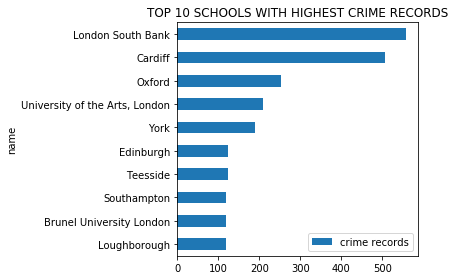

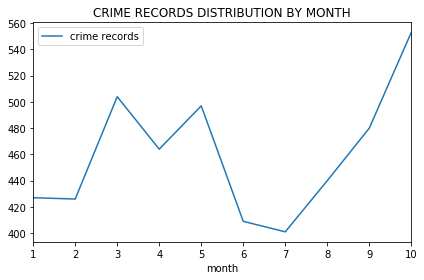

In [9]:
# We create a object for test and plot the general statistical graphs
a=analysis()
a1=a.STAT()

In [10]:
#View the detailed information for each school
a1=a.query()

INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
             5.Get the trend for a type of crime of a school;
             6.Get the top 10 dangerous school;
             7.Get the school without crime records;
             8.Quit.
1
    rank                                  name        lat       lng
0      1                             Cambridge  52.205337  0.121817
1      2                                Oxford  51.752021 -1.257726
2      3                            St Andrews  56.339775 -2.796721
3      4            London School of Economics  51.514439 -0.116451
4      5               Imperial College London  51.498800 -0.174877
5      6                                Durham  54.775250 -1.584852
6      7                             Lancaster  54.046575 -2.800740
7      8                       

INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
             5.Get the trend for a type of crime of a school;
             6.Get the top 10 dangerous school;
             7.Get the school without crime records;
             8.Quit.
2
Input the school name you want to query :
Cambridge
   school_id       name    month  drugs  vehicle-crime  shoplifting  burglary  \
0          0  Cambridge   2019-1      0              0            0         0   
1          0  Cambridge   2019-2      0              0            0         0   
2          0  Cambridge   2019-3      0              0            0         0   
3          0  Cambridge   2019-4      0              0            0         0   
4          0  Cambridge   2019-5      0              0            1         0   
5          0  Cambridge   2019-6     

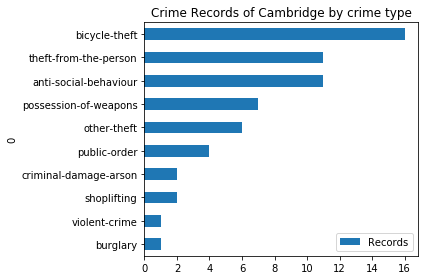

In [11]:
#View the crime records for a school and plot the counts for each type of crime
#We use Cambridge as our example here
a1=a.query()

In [13]:
#View the crime records for a month
#We use March as our example here
a1=a.query()

INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
             5.Get the trend for a type of crime of a school;
             6.Get the top 10 dangerous school;
             7.Get the school without crime records;
             8.Quit.
3
Input the month you want to query :
6
    month  drugs  vehicle-crime  shoplifting  burglary  robbery  \
0  2019-6      8              9           31        15        4   

   anti-social-behaviour  possession-of-weapons  public-order  bicycle-theft  \
0                     57                      5            34             33   

   theft-from-the-person  other-theft  violent-crime  criminal-damage-arson  \
0                     35           83             83                      8   

   other-crime  
0            4  
INPUT A NUMBER TO MAKE YOUR QUERY
             1

INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
             5.Get the trend for a type of crime of a school;
             6.Get the top 10 dangerous school;
             7.Get the school without crime records;
             8.Quit.
4
Please choose a type from["drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson"] to make a query :
public-order
INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
             5.Get the trend for a type of crime of a schoo

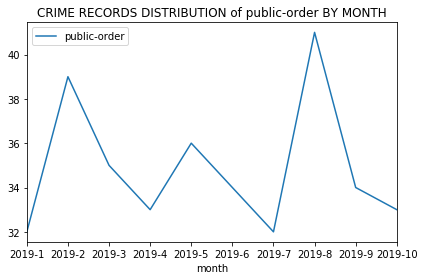

In [14]:
#View a crime type's trend distributed by month
#We use "public-order" as our example here
a1=a.query()

INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
             5.Get the trend for a type of crime of a school;
             6.Get the top 10 dangerous school;
             7.Get the school without crime records;
             8.Quit.
5
Please choose a type from["drugs","vehicle-crime","shoplifting","burglary","robbery","anti-social-behaviour","possession-of-weapons","public-order", "bicycle-theft","theft-from-the-person", "other-theft","violent-crime", "criminal-damage-arson"] to make a query :
bicycle-theft
Please input the school you want to view:
Oxford
INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
         

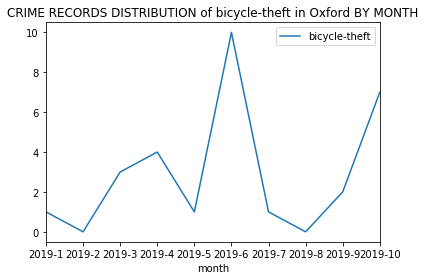

In [16]:
#View a crime type's trend in a specific school distributed by month
#We use "bicycle-theft" in Oxford as our example here
a1=a.query()

In [17]:
#View the top 10 dangerous school

a1=a.query()

INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
             5.Get the trend for a type of crime of a school;
             6.Get the top 10 dangerous school;
             7.Get the school without crime records;
             8.Quit.
6
                             name  Total Crime Records
0               London South Bank                  558
1                         Cardiff                  506
2                          Oxford                  253
3  University of the Arts, London                  208
4                            York                  190
5                       Edinburgh                  125
6                        Teesside                  124
7                     Southampton                  120
8        Brunel University London                  119
9                    Loug

In [19]:
#View  the school without crime records

a1=a.query()

INPUT A NUMBER TO MAKE YOUR QUERY
             1.Get shcool's rank and location informations;
             2.Get a school's crime records;
             3.Get a month's crime records;
             4.Get the trend for a type of crime in UK;
             5.Get the trend for a type of crime of a school;
             6.Get the top 10 dangerous school;
             7.Get the school without crime records;
             8.Quit.
7
                     name  Total Crime Records
0               Edge Hill                    0
1        Edinburgh Napier                    0
2             Heriot-Watt                    0
3          Liverpool Hope                    0
4   Liverpool John Moores                    0
5             Northumbria                    0
6              Nottingham                    0
7        Nottingham Trent                    0
8              St Andrews                    0
9           Staffordshire                    0
10                 Sussex                    0
INPUT A NUM